In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
# import os
# path = '/content/drive/MyDrive/ML'
# os.listdir(path)

In [3]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [4]:
# #define relative path to dataset
# path_train = '/content/drive/MyDrive/ML/sign_mnist_train.csv'
# path_test = '/content/drive/MyDrive/ML/sign_mnist_test.csv'

# #define image resolution 
# res = (28,28)

In [5]:
#define relative path to dataset
path_train = '/Users/sumaiyauddin/Documents/ML/Project/sign_mnist_train.csv'
path_test = '/Users/sumaiyauddin/Documents/ML/Project/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [6]:
#saving data into pandas dataframes 
test = pd.read_csv(path_test)
train = pd.read_csv(path_train)

In [7]:
#printing shape
print(f'Train Shape:{train.shape}')
print(f'Test Shape:{test.shape}')

Train Shape:(27455, 785)
Test Shape:(7172, 785)


In [8]:
#training data 
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

#testing data
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

In [9]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

In [10]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(y_train.unique()))
#dictionary of labels 
labels = dict(zip(numbers,letters))

In [11]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

In [12]:
#standardized data 
#using sklearn standard scaler model and fitting on training data 
sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [22]:
lr = LogisticRegression(max_iter=5000)

In [23]:
# applying Logistic regression on standerdized data
y_pred_lr_sc = lr.fit(X_train_sc, y_train).predict(X_test_sc)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_sc)}")
print("Classification report:")
print(classification_report(y_test, y_pred_lr_sc, target_names=letters))

Accuracy: 0.6985499163413273
Classification report:
              precision    recall  f1-score   support

           A       0.84      1.00      0.91       331
           B       1.00      0.89      0.94       432
           C       0.91      0.90      0.91       310
           D       0.92      0.92      0.92       245
           E       0.92      0.87      0.89       498
           F       0.69      0.91      0.78       247
           G       0.82      0.78      0.80       348
           H       0.78      0.66      0.72       436
           I       0.65      0.66      0.66       288
           K       0.61      0.40      0.48       331
           L       0.53      0.84      0.65       209
           M       0.75      0.71      0.73       394
           N       0.64      0.57      0.60       291
           O       1.00      0.65      0.79       246
           P       0.87      0.95      0.91       347
           Q       0.62      0.74      0.68       164
           R       0.17      

### SVD Implementation

In [13]:
from sklearn.decomposition import TruncatedSVD
n_components = 10
svd = TruncatedSVD(n_components, n_iter=7, random_state=42)

# Build the pipeline
pipe = Pipeline([('reducer', svd)])

In [20]:
# Fit the pipeline to X_train_sc and transform the data
X_train_svd = pipe.fit_transform(X_train_sc)
X_test_svd = pipe.fit_transform(X_test_sc)

In [15]:
# calculate the explained variance ratio for each component
explained_variance_ratio = svd.explained_variance_ratio_
explained_variance_ratio

array([0.37126572, 0.08811823, 0.06954614, 0.052848  , 0.03469435,
       0.02877584, 0.02643879, 0.02192885, 0.0196482 , 0.01640896])

In [16]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio

array([0.37126572, 0.45938395, 0.52893009, 0.58177809, 0.61647243,
       0.64524827, 0.67168706, 0.69361592, 0.71326412, 0.72967308])

/var/folders/ph/_s861md14q5c2ykky6q5pgd80000gn/T/ipykernel_32466/4091209504.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1,n_components+1), var, 'b-o', color='green')


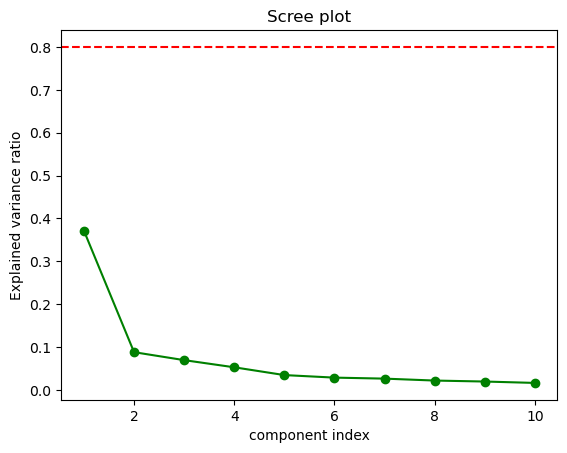

In [17]:
# Plot explained variance ratio
var = pipe['reducer'].explained_variance_ratio_
plt.plot(range(1,n_components+1), var, 'b-o', color='green')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.xlabel('component index')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.show()

Text(0.5, 1.0, 'Scree Plot')

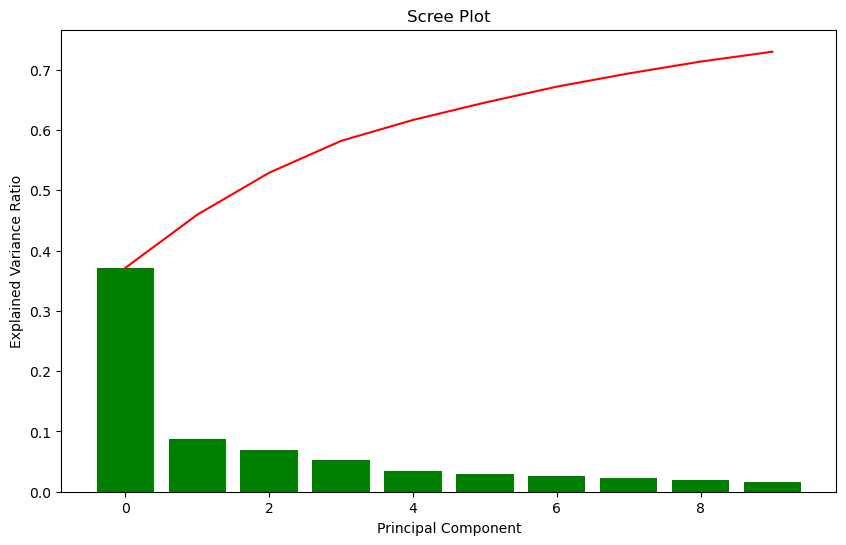

In [18]:
#Plotting the scree plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(explained_variance_ratio)), explained_variance_ratio, color='green')
ax.plot(range(len(cumulative_variance_ratio)), cumulative_variance_ratio, color='red')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scree Plot')

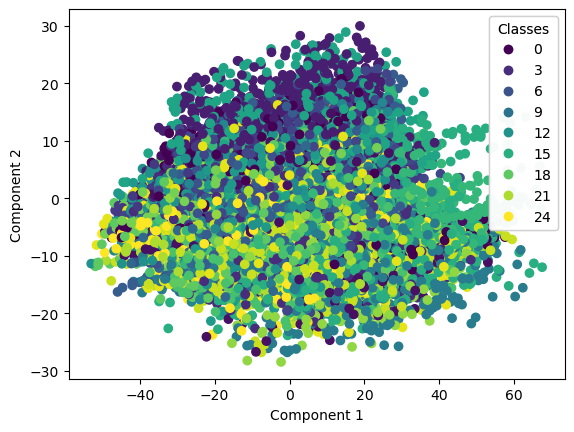

In [19]:
# Visualize the data after SVD
fig, ax = plt.subplots()
scatter = ax.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
legend = ax.legend(*scatter.legend_elements(), title='Classes')
ax.add_artist(legend)
plt.show()

In [25]:
# applying Logistic regression on standerdized data
y_pred_lr_svd = lr.fit(X_train_svd, y_train).predict(X_test_svd)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_svd)}")
print("Classification report:")
print(classification_report(y_test, y_pred_lr_svd, target_names=letters))

Accuracy: 0.03165086447295036
Classification report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       331
           B       0.00      0.00      0.00       432
           C       0.00      0.00      0.00       310
           D       0.00      0.00      0.00       245
           E       0.00      0.00      0.00       498
           F       0.01      0.01      0.01       247
           G       0.14      0.09      0.11       348
           H       0.21      0.09      0.12       436
           I       0.07      0.04      0.05       288
           K       0.12      0.05      0.07       331
           L       0.00      0.00      0.00       209
           M       0.00      0.00      0.00       394
           N       0.07      0.09      0.08       291
           O       0.00      0.00      0.00       246
           P       0.00      0.00      0.00       347
           Q       0.05      0.13      0.07       164
           R       0.00     

In [26]:
# applying Logistic regression on standerdized data
y_pred_lr_svd = lr.fit(X_train_svd, y_train).predict(X_train_svd)

print(f"Accuracy: {accuracy_score(y_train, y_pred_lr_svd)}")
print("Classification report:")
print(classification_report(y_train, y_pred_lr_svd, target_names=letters))

Accuracy: 0.4692769987251867
Classification report:
              precision    recall  f1-score   support

           A       0.52      0.67      0.58      1126
           B       0.56      0.67      0.61      1010
           C       0.83      0.82      0.82      1144
           D       0.37      0.36      0.37      1196
           E       0.56      0.66      0.61       957
           F       0.46      0.48      0.47      1204
           G       0.58      0.64      0.61      1090
           H       0.54      0.55      0.55      1013
           I       0.39      0.41      0.40      1162
           K       0.57      0.64      0.60      1114
           L       0.48      0.60      0.54      1241
           M       0.26      0.13      0.18      1055
           N       0.39      0.34      0.36      1151
           O       0.59      0.53      0.56      1196
           P       0.60      0.67      0.63      1088
           Q       0.55      0.58      0.57      1279
           R       0.29      